# Problem 1: K-Nearest Neighbors
Create  a 2-dimensional  data set  with  30  samples that  has the following  properties
1. Samples  should belong to  2  classes (15  samples per  class)
2. Using  a Logistic Regression  classifier,  all  samples from  both  classes can  be correctly  classified
3. Using  a K-NN classifier,  with  K=3,  two  samples from  each  class  will  always be misclassified. The remaining  26  can  be classified correctly.

Generate a scatter  plot  of  your  data.  Use a different  color/symbol  for  each  class.  Indicate  the  4  samples that  cannot  be  classified  correctly  using  the  KNN  and explain the  reasons.

Note:  This  data  should  be  generated  manually  and  you  do not  need to run  any  code  on  it


In [80]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
from numpy import random

random.seed(42)


def generate_neighborhood_in_rectangle(
        class_name,
        neighbor_count,
        x_min,
        x_max,
        y_min,
        y_max,
):
    items = []
    X_set = []
    y_set = []
    for i in range(0, neighbor_count):
        feature_1 = random.randint(x_min, x_max)
        feature_2 = random.randint(y_min, y_max)
        # item = {'class': class_name, 'x': x, 'y': y}
        item = [class_name, feature_1, feature_2]
        X_set.append([feature_1, feature_2])
        y_set.append(class_name)

    neighborhood = pd.DataFrame(items, columns=['Class', 'f1', 'f2'])

    return np.array(X_set), np.array(y_set)


def split_X_y(neighborhood):
    y = pd.DataFrame(neighborhood.Class, columns=['Class'])
    X = pd.DataFrame([
        neighborhood,
        neighborhood.f2
    ], columns=['f1', 'f2'])
    return X, y

[[6 3]
 [7 4]
 [6 9]
 [2 6]
 [7 4]
 [3 7]
 [7 2]
 [5 4]
 [1 7]
 [5 1]
 [4 0]
 [9 5]
 [8 0]]
['alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha'
 'alpha' 'alpha' 'alpha' 'alpha']
[]
[[6 3]]


Text(0, 0.5, 'Feature: Y')

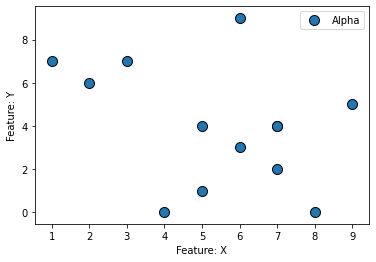

In [82]:
random.seed(42)

X, y = generate_neighborhood_in_rectangle('alpha', 13, 0, 10, 0, 10)
print(X)
print(y)

print(X[:0])
print(X[:1])
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['Alpha'])
plt.xlabel('Feature: X')
plt.ylabel('Feature: Y')

TypeError: list indices must be integers or slices, not tuple

In [51]:
X, y = mglearn.datasets.make_forge()
print(X)
print(y)
print(X[:,0])

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
[ 9.96346605 11.0329545  11.54155807  8.69289001  8.1062269   8.30988863
 11.93027136  9.67284681  8.34810316  8.67494727  9.17748385 10.24028948
  8.68937095  8.92229526  9.49123469  9.25694192  7.99815287  8.18378052
  8.7337095   9.32298256

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
